In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from datetime import date


import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 

### ENSO climatology

In [6]:
file_path="/Users/dongxiay/Documents/data/"
f=xr.open_dataset(file_path+"/20cr_mean_shumvmean_elnino_1950_2014.nc")
obs=f['shcli']*1000

import regionmask
mask = regionmask.defined_regions.natural_earth.countries_110.mask(obs)
AU_index = regionmask.defined_regions.natural_earth.countries_110.map_keys('AU')
obs_el = obs.where(mask == AU_index)

ds_U=xr.open_dataset(file_path+"20cr_mean_Uano_elninomon_1950_2014.nc")
U850_el=ds_U['Ucli']

ds_V=xr.open_dataset(file_path+"20cr_mean_Vano_elnino_1950_2014.nc")
V850_el=ds_V['Vcli']

lon=ds_U['lon'].loc[100:160].to_numpy()
lat=ds_U['lat'].loc[-45:20].to_numpy()
lon, lat = np.meshgrid(lon, lat)


In [7]:
f=xr.open_dataset(file_path+"/20cr_mean_shumvmean_lanina_1950_2014.nc")
obs=f['shcli']*1000
obs_la = obs.where(mask == AU_index)

ds_U=xr.open_dataset(file_path+"/20cr_mean_Uano_laninamon_1950_2014.nc")
U850_la=ds_U['Ucli']

ds_V=xr.open_dataset(file_path+"/20cr_mean_Vano_lanina_1950_2014.nc")
V850_la=ds_V['Vcli']

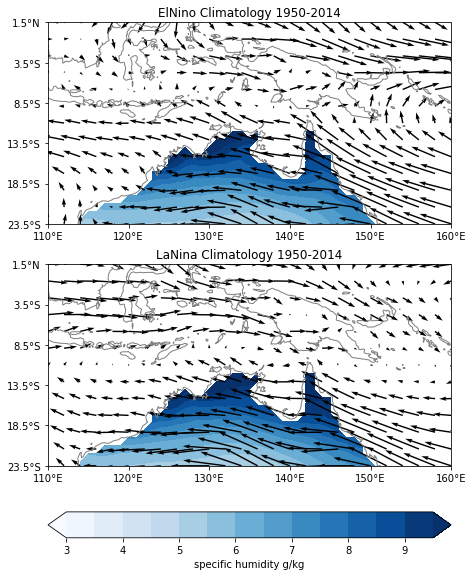

In [9]:
lon=ds_U['lon'].loc[100:160].to_numpy()
lat=ds_U['lat'].loc[-45:20].to_numpy()
lon, lat = np.meshgrid(lon, lat)


x=lon
y=lat

leftlon, rightlon, lowerlat, upperlat = (110,160,-23.5,0)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

title=['ElNino Climatology 1950-2014', 'LaNina Climatology 1950-2014']

fig = plt.figure(figsize=(14,12))


ax = fig.add_axes([0.1, 1.5, 0.4, 0.3],projection = ccrs.PlateCarree())
#         ax.set_title('({})'.format(title[i,j]),loc='left',fontsize=14)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey',linewidth=1) 
ax.set_xticks(np.arange(leftlon,rightlon+10,10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lowerlat,upperlat+5,5), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text(title[0])
c = ax.contourf(obs['lon'],obs['lat'],obs_el,
                levels=np.arange(3,10,0.5),
                extend='both' ,
                cmap=plt.cm.Blues,
                transform=ccrs.PlateCarree()) 
#Add wind 
vector = ax.quiver(x, y, U850_el.to_numpy(), V850_el.to_numpy(),
                transform=ccrs.PlateCarree(), 
                scale=60,
                width=0.0035,
                regrid_shape=13)
#         #Add MSLP
#         cs = ax2.contour(lons, phases, mpcalc.smooth_n_point(avg_data, 9, 2), 
#                  clevs, 
#                  colors='k', linewidths=1)
        
    
ax2 = fig.add_axes([0.1, 1.5-0.28, 0.4, 0.3],projection = ccrs.PlateCarree())   
ax2.set_extent(img_extent, crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.COASTLINE,color='grey',linewidth=1) 
ax2.set_xticks(np.arange(leftlon,rightlon+10,10), crs=ccrs.PlateCarree())
ax2.set_yticks(np.arange(lowerlat,upperlat+5,5), crs=ccrs.PlateCarree())
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)
ax2.title.set_text(title[1])
c = ax2.contourf(obs['lon'],obs['lat'],obs_la,
                levels=np.arange(3,10,0.5),
                extend='both' ,
                cmap=plt.cm.Blues,
                transform=ccrs.PlateCarree()) 
#Add wind 
vector = ax2.quiver(x, y, U850_la.to_numpy(), V850_la.to_numpy(),
                transform=ccrs.PlateCarree(), 
                scale=60,
                width=0.0035,
                regrid_shape=13)    
    
  

# To this end, you may create a colorbar axes (cax) outside the loop
fig.colorbar(c, cax=fig.add_axes([0.1, 1.17, 0.4, 0.03 ]),
             orientation='horizontal',  
             label= 'specific humidity g/kg', 
             ticks=np.arange(0,10,1),
             shrink=0.7)
# st=fig.suptitle("Daily rainfall/850hPa wind-std composite (Nov-Apr)",fontsize="x-large")
fig.subplots_adjust(top=1.5)

# plt.savefig("MJOcomp_meanrain_ElNino_std.pdf", format="pdf",bbox_inches = 'tight')

### ElNino anomalies

In [23]:
file_path="/Users/dongxiay/Documents/data/"
f=xr.open_dataset(file_path+"/20cr_mean_shumvmean_elnino_1950_2014.nc")
obs=f['shano']*1000

import regionmask
mask = regionmask.defined_regions.natural_earth.countries_110.mask(obs)
AU_index = regionmask.defined_regions.natural_earth.countries_110.map_keys('AU')
obs_AU = obs.where(mask == AU_index)

ds_U=xr.open_dataset(file_path+"20cr_mean_Uano_elninomon_1950_2014.nc")
U850=ds_U['Uano']

ds_V=xr.open_dataset(file_path+"20cr_mean_Vano_elnino_1950_2014.nc")
V850=ds_V['Vano']

lon=ds_U['lon'].loc[100:160].to_numpy()
lat=ds_U['lat'].loc[-45:20].to_numpy()
lon, lat = np.meshgrid(lon, lat)

In [24]:
# import NCL colormap
! pip install cmaps
import cmaps

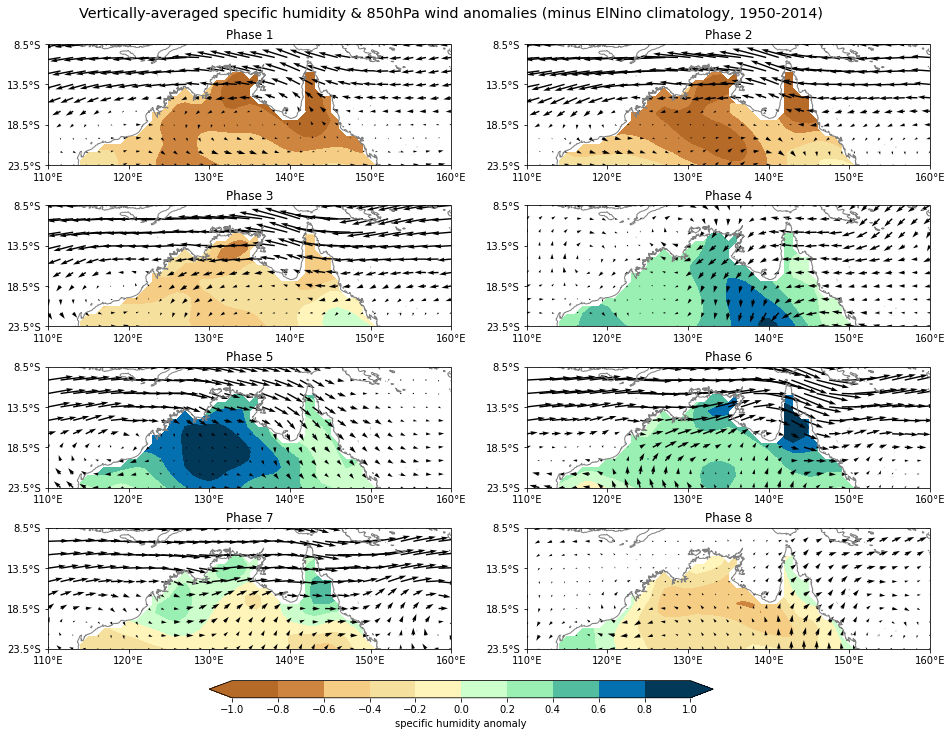

In [27]:
lon=ds_U['lon'].loc[100:160].to_numpy()
lat=ds_U['lat'].loc[-45:20].to_numpy()
lon, lat = np.meshgrid(lon, lat)
clevels=np.arange(-1,1.2,0.2)

x=lon
y=lat

leftlon, rightlon, lowerlat, upperlat = (110,160,-23.5,-10)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

title=[]
for i in range(1,9,1):
    title.append(f'Phase {i}')
   
fig = plt.figure(figsize=(14,8))

for i in range(4):
    for j in range(2):
        ax = fig.add_axes([0.1+j*0.475, 1.5-i*0.28, 0.4, 0.3],projection = ccrs.PlateCarree())
#         ax.set_title('({})'.format(title[i,j]),loc='left',fontsize=14)
        ax.set_extent(img_extent, crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE,color='grey',linewidth=1) 
        ax.set_xticks(np.arange(leftlon,rightlon+10,10), crs=ccrs.PlateCarree())
        ax.set_yticks(np.arange(lowerlat,upperlat+5,5), crs=ccrs.PlateCarree())
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.title.set_text(title[i*2+j])
        c = ax.contourf(obs['lon'],obs['lat'],obs_AU[i*2+j+1,:,:],
                        levels=clevels,
                        extend='both' ,
                        cmap=cmaps.precip_diff_12lev,
                        transform=ccrs.PlateCarree()) 
        #Add wind 
        cf2 = ax.quiver(x, y, U850[i*2+j+1,:,:].to_numpy(), V850[i*2+j+1,:,:].to_numpy(),
                        transform=ccrs.PlateCarree(), 
                        scale=60,
                        width=0.0035,
                        regrid_shape=10)
#         #Add MSLP
#         cs = ax2.contour(lons, phases, mpcalc.smooth_n_point(avg_data, 9, 2), 
#                  clevs, 
#                  colors='k', linewidths=1)
        
#colorbar, You would want to make sure the colorbar always sits in the same axes. 
# To this end, you may create a colorbar axes (cax) outside the loop
fig.colorbar(c, cax=fig.add_axes([0.26, 0.62, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'specific humidity anomaly', 
             ticks=np.arange(-1,1.2,0.2),
             shrink=0.7)
st=fig.suptitle("Vertically-averaged specific humidity & 850hPa wind anomalies (minus ElNino climatology, 1950-2014)",fontsize="x-large")
st.set_y(1.82)
fig.subplots_adjust(top=1.5)

# plt.savefig("MJOcomp_meanrain_ElNino_std.pdf", format="pdf",bbox_inches = 'tight')

### LaNina Anomaly

In [15]:
file_path="/Users/dongxiay/Documents/data/"
f=xr.open_dataset(file_path+"/20cr_mean_shumvmean_lanina_1950_2014.nc")
obs=f['shano']*1000

import regionmask
mask = regionmask.defined_regions.natural_earth.countries_110.mask(obs)
AU_index = regionmask.defined_regions.natural_earth.countries_110.map_keys('AU')
obs_AU = obs.where(mask == AU_index)

ds_U=xr.open_dataset(file_path+"20cr_mean_Uano_laninamon_1950_2014.nc")
U850=ds_U['Uano']

ds_V=xr.open_dataset(file_path+"20cr_mean_Vano_lanina_1950_2014.nc")
V850=ds_V['Vano']

lon=ds_U['lon'].loc[100:160].to_numpy()
lat=ds_U['lat'].loc[-45:20].to_numpy()
lon, lat = np.meshgrid(lon, lat)

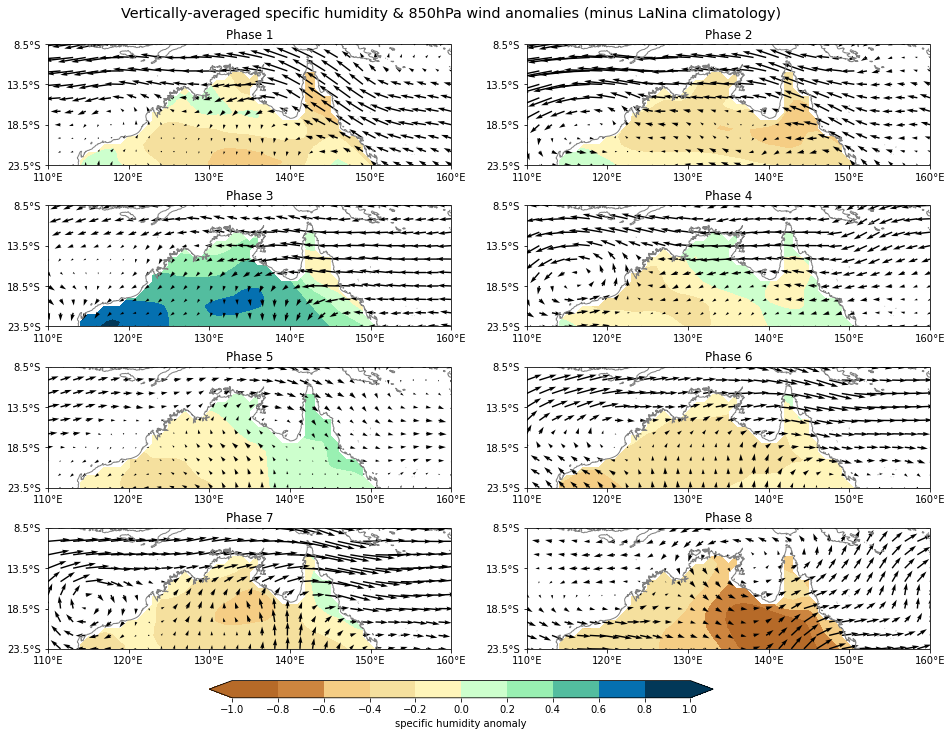

In [22]:
lon=ds_U['lon'].loc[100:160].to_numpy()
lat=ds_U['lat'].loc[-45:20].to_numpy()
lon, lat = np.meshgrid(lon, lat)
clevels=np.arange(-1,1.2,0.2)

x=lon
y=lat

leftlon, rightlon, lowerlat, upperlat = (110,160,-23.5,-10)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

title=[]
for i in range(1,9,1):
    title.append(f'Phase {i}')
   
fig = plt.figure(figsize=(14,8))

for i in range(4):
    for j in range(2):
        ax = fig.add_axes([0.1+j*0.475, 1.5-i*0.28, 0.4, 0.3],projection = ccrs.PlateCarree())
#         ax.set_title('({})'.format(title[i,j]),loc='left',fontsize=14)
        ax.set_extent(img_extent, crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE,color='grey',linewidth=1) 
        ax.set_xticks(np.arange(leftlon,rightlon+10,10), crs=ccrs.PlateCarree())
        ax.set_yticks(np.arange(lowerlat,upperlat+5,5), crs=ccrs.PlateCarree())
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.title.set_text(title[i*2+j])
        c = ax.contourf(obs['lon'],obs['lat'],obs_AU[i*2+j+1,:,:],
                        levels=clevels,
                        extend='both' ,
                        cmap=cmaps.precip_diff_12lev,
                        transform=ccrs.PlateCarree()) 
        #Add wind 
        cf2 = ax.quiver(x, y, U850[i*2+j+1,:,:].to_numpy(), V850[i*2+j+1,:,:].to_numpy(),
                        transform=ccrs.PlateCarree(), 
                        scale=40,
                        width=0.0035,
                        regrid_shape=10)
#         #Add MSLP
#         cs = ax2.contour(lons, phases, mpcalc.smooth_n_point(avg_data, 9, 2), 
#                  clevs, 
#                  colors='k', linewidths=1)
        
#colorbar, You would want to make sure the colorbar always sits in the same axes. 
# To this end, you may create a colorbar axes (cax) outside the loop
fig.colorbar(c, cax=fig.add_axes([0.26, 0.62, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'specific humidity anomaly', 
             ticks=np.arange(-1,1.2,0.2),
             shrink=0.7)
st=fig.suptitle("Vertically-averaged specific humidity & 850hPa wind anomalies (minus LaNina climatology)",fontsize="x-large")
st.set_y(1.82)
fig.subplots_adjust(top=1.5)

# plt.savefig("MJOcomp_meanrain_ElNino_std.pdf", format="pdf",bbox_inches = 'tight')